** D'abord, faire un Run All Cell sur le notebook "hw2_site1.ipynb", puis faire les tasks d'analyse ici **

In [348]:
import pandas as pd

uni_s1 = pd.read_pickle("site1.pkl")
uni_s2 = pd.read_pickle("site2.pkl")
uni_s1.head()


,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url
0,Massachusetts Institute of Technology (MIT),1,United States,North America,1679.0,2982.0,3717.0,11067.0,/universities/massachusetts-institute-technolo...
1,Stanford University,2,United States,North America,2042.0,4285.0,3611.0,15878.0,/universities/stanford-university
2,Harvard University,3,United States,North America,1311.0,4350.0,5266.0,22429.0,/universities/harvard-university
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge


In [309]:
import re
import numpy as np
from itertools import product
from scipy.optimize import linear_sum_assignment
from nltk.metrics import edit_distance


n1 = uni_s1.name
n2 = uni_s2.name

costs = np.array([[0]*len(n1)]*len(n2))

for i, u1 in enumerate(n1):
    for j, u2 in enumerate(n2):
        c = edit_distance(u1,u2)
        costs[i][j] = c

ImportError: No module named 'nltk'

In [ ]:
id_n1, id_n2 = linear_sum_assignment(costs)

In [77]:
for i, j in zip(id_n1, id_n2):
    print(n1[i], "==",n2[j])
    

Massachusetts Institute of Technology (MIT) == Massachusetts Institute of Technology
Stanford University == Stanford University
Harvard University == Harvard University
California Institute of Technology (Caltech) == California Institute of Technology
University of Cambridge == University of Cambridge
University of Oxford == University of Oxford
UCL (University College London) == University College London
Imperial College London == Imperial College London
University of Chicago == University of Chicago
ETH Zurich - Swiss Federal Institute of Technology == ETH Zurich – Swiss Federal Institute of Technology Zurich
Nanyang Technological University, Singapore (NTU) == Nanyang Technological University, Singapore
Ecole Polytechnique Fédérale de Lausanne (EPFL) == École Polytechnique Fédérale de Lausanne
Princeton University == Princeton University
Cornell University == Cornell University
National University of Singapore (NUS) == National University of Singapore
Yale University == Yale Univers

uni_s1 and uni_s2 are the dataframes corresponding to the rankings from the first and second websites respectively. For each university, we use the data from the columns with values for the total number of students, faculty members and international students to compute the student/staff ratio and the proportion of international students for each university. We then sort the dataframes according to each ratio to find the best universities with respect to each.

In [325]:
uni_s2.head()

,name,rank,country,pc_intl_students,student_staff_ratio,url
0,University of Oxford,1,United Kingdom,38,11.2,/world-university-rankings/university-oxford
1,University of Cambridge,2,United Kingdom,35,10.9,/world-university-rankings/university-cambridge
2,California Institute of Technology,3,United States,27,6.5,/world-university-rankings/california-institut...
3,Stanford University,3,United States,22,7.5,/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,5,United States,34,8.7,/world-university-rankings/massachusetts-insti...


In [349]:
#ratio computations for s1 only because they are already available for s2
uni_s1['staff_student_ratio'] = uni_s1.apply(lambda row: row.fac_c_total/row.stu_c_total, axis=1)
uni_s1['pc_intl_students'] = uni_s1.apply(lambda row: (row.stu_c_inter/row.stu_c_total), axis=1)
#transforming of the ratios for s2 so that they are comparable with the data for s1
uni_s2['staff_student_ratio'] = uni_s2.apply(lambda row: 1/float(row.student_staff_ratio), axis=1)
uni_s2['pc_intl_students'] = uni_s2.apply(lambda row: (row.pc_intl_students)/100, axis=1)
#sorting of data with respect to each ratio
uni_s1_FSsort=uni_s1.sort_values('staff_student_ratio', ascending=False)
uni_s1_Int=uni_s1.sort_values('pc_intl_students', ascending=False)
uni_s2_FSsort=uni_s2.sort_values('staff_student_ratio', ascending=False)
uni_s2_Int=uni_s2.sort_values('pc_intl_students', ascending=False)
uni_s1_FSsort.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,staff_student_ratio,pc_intl_students
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...,0.422616,0.286918
15,Yale University,16,United States,North America,1708.0,4940.0,2469.0,12402.0,/universities/yale-university,0.398323,0.199081
5,University of Oxford,6,United Kingdom,Europe,2964.0,6750.0,7353.0,19720.0,/universities/university-oxford,0.342292,0.372870
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge,0.292488,0.356899
16,Johns Hopkins University,17,United States,North America,1061.0,4462.0,4105.0,16146.0,/universities/johns-hopkins-university,0.276353,0.254243


In [327]:
uni_s2_FSsort.head()

,name,rank,country,pc_intl_students,student_staff_ratio,url,staff_student_ratio
105,Vanderbilt University,105,United States,0.13,3.3,/world-university-rankings/vanderbilt-university,0.303030
109,University of Copenhagen,109,Denmark,0.14,4.1,/world-university-rankings/university-copenhagen,0.243902
153,University of Rochester,153,United States,0.29,4.3,/world-university-rankings/university-rochester,0.232558
11,Yale University,12,United States,0.21,4.3,/world-university-rankings/yale-university,0.232558
12,Johns Hopkins University,13,United States,0.24,4.3,/world-university-rankings/johns-hopkins-unive...,0.232558


In [328]:
uni_s1_Int.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,staff_student_ratio,pc_intl_students
34,London School of Economics and Political Scien...,35,United Kingdom,Europe,687.0,1088.0,6748.0,9760.0,/universities/london-school-economics-politica...,0.111475,0.691393
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),12,Switzerland,Europe,1300.0,1695.0,5896.0,10343.0,/universities/ecole-polytechnique-f%C3%A9d%C3%...,0.163879,0.570047
7,Imperial College London,8,United Kingdom,Europe,2071.0,3930.0,8746.0,16090.0,/universities/imperial-college-london,0.244251,0.543567
198,Maastricht University,200,Netherlands,Europe,502.0,1277.0,8234.0,16385.0,/universities/maastricht-university,0.077937,0.502533
47,Carnegie Mellon University,47,United States,North America,425.0,1342.0,6385.0,13356.0,/universities/carnegie-mellon-university,0.100479,0.478062


In [329]:
uni_s2_Int.head()

,name,rank,country,pc_intl_students,student_staff_ratio,url,staff_student_ratio
24,London School of Economics and Political Science,25,United Kingdom,0.71,12.2,/world-university-rankings/london-school-econo...,0.081967
178,University of Luxembourg,179,Luxembourg,0.57,14.6,/world-university-rankings/university-luxembourg,0.068493
37,École Polytechnique Fédérale de Lausanne,38,Switzerland,0.55,11.2,/world-university-rankings/ecole-polytechnique...,0.089286
7,Imperial College London,8,United Kingdom,0.55,11.4,/world-university-rankings/imperial-college-lo...,0.087719
102,Maastricht University,103,Netherlands,0.50,18.0,/world-university-rankings/maastricht-university,0.055556


According to website 1 the two best universities with respect to the staff/student ratio are Caltech and Yale. The two best universities with respect to the proportion of international students are  London School of Economics and Political Sciences and Ecole Polytechnique Fédérale de Lausanne (EPFL).

According to website 2 the two best universities with respect to the staff/student ratio are Vanderbilt University and University of Copenhagen. The two best universities with respect to the proportion of international students are  London School of Economics and Political Sciences and University of Luxembourg.

We now aggregate our results by country and region by grouping the data and computing the mean of the ratios for each group.

In [350]:

def aggregation(df, grouping):
    dfgroup=df.groupby(grouping)
    ratioFacStuMean=[] 
    ratioInterMean=[]
    list=[]
    for variable in dfgroup[grouping].unique():
        tmp=dfgroup.get_group(variable[0])
        ratioFacStuMean.append(tmp['staff_student_ratio'].mean()) 
        ratioInterMean.append(tmp['pc_intl_students'].mean())
    df_ratiogroup=pd.DataFrame(data={grouping: dfgroup[grouping].unique(), 'staff_student_ratio_mean': ratioFacStuMean, 'pc_intl_students_mean':ratioInterMean})
    df_RFC=df_ratiogroup.sort_values('staff_student_ratio_mean', ascending=False)
    df_RI=df_ratiogroup.sort_values('pc_intl_students_mean', ascending=False)
    return df_RFC, df_RI

uni_s1_RFC_country, uni_s1_RI_country= aggregation(uni_s1, 'country')
uni_s1_RFC_region, uni_s1_RI_region= aggregation(uni_s1, 'region')
uni_s2['staff_student_ratio']=pd.to_numeric(uni_s2['staff_student_ratio'])
uni_s2_RFC_country, uni_s2_RI_country= aggregation(uni_s2, 'country')


In [358]:
uni_s2_RI_country.head()

,country,pc_intl_students_mean,staff_student_ratio_mean
country,,,
Luxembourg,[Luxembourg],0.570000,0.068493
United Kingdom,[United Kingdom],0.365484,0.074252
Hong Kong,[Hong Kong],0.328000,0.056622
Switzerland,[Switzerland],0.314286,0.083447
Australia,[Australia],0.307500,0.038233


We plot our results in bar charts

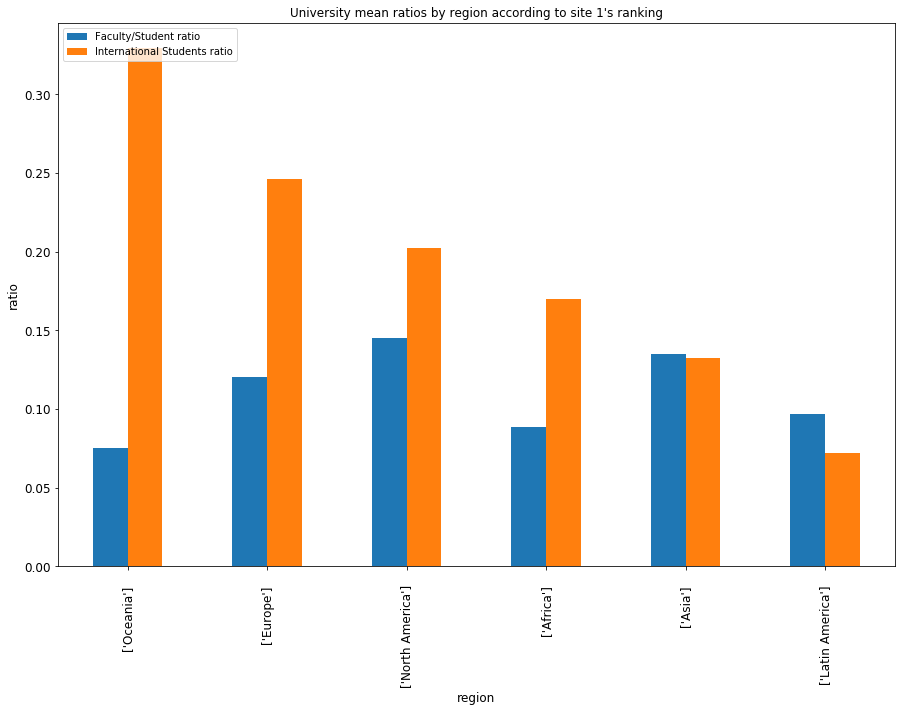

In [351]:
import matplotlib.pyplot as plt
ax = uni_s1_RI_region[['staff_student_ratio_mean','pc_intl_students_mean']].plot(kind='bar', title ="University mean ratios by region according to site 1's ranking", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("region", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_RI_region.region)
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio', 'International Students ratio'], loc='upper left')
plt.show()

From the plot above, we notice that the best region according to site 1 in terms of proportion of international students is Oceania and followed by Europe then North America. In terms of proportion of Faculty Members to Students the best region is North America followed by Asia and Europe. 

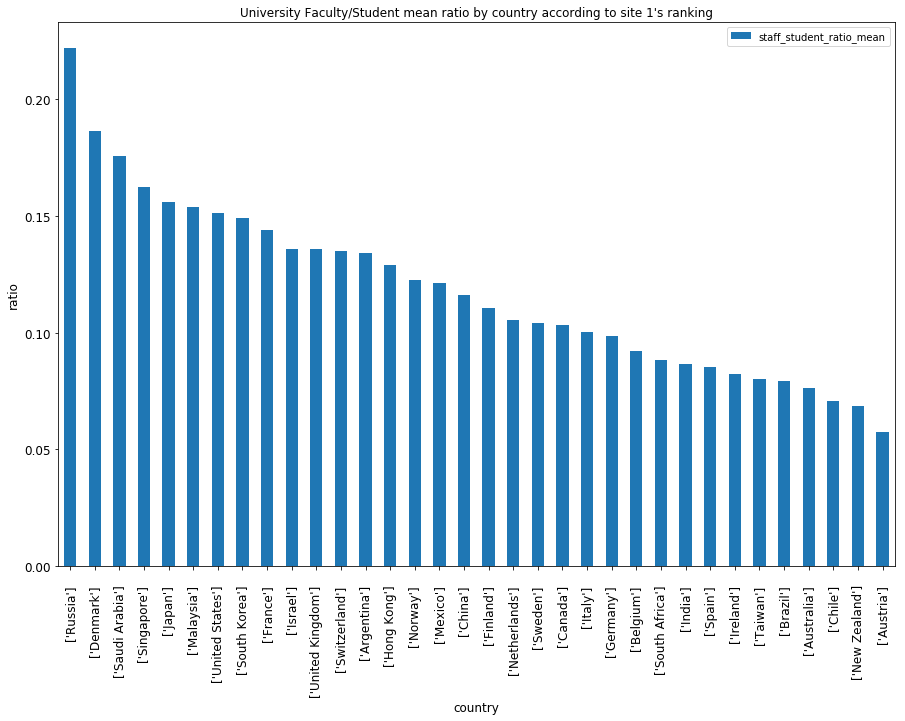

In [361]:
bx = uni_s1_RFC_country[['staff_student_ratio_mean']].plot(kind='bar', title ="University Faculty/Student mean ratio by country according to site 1's ranking", figsize=(15, 10), legend=True, fontsize=12)
bx.set_xlabel("country", fontsize=12)
bx.set_ylabel("ratio", fontsize=12)
bx.set_xticklabels(uni_s1_RFC_country.country)
bx.tick_params(axis='x', which='major', pad=15)
plt.show()

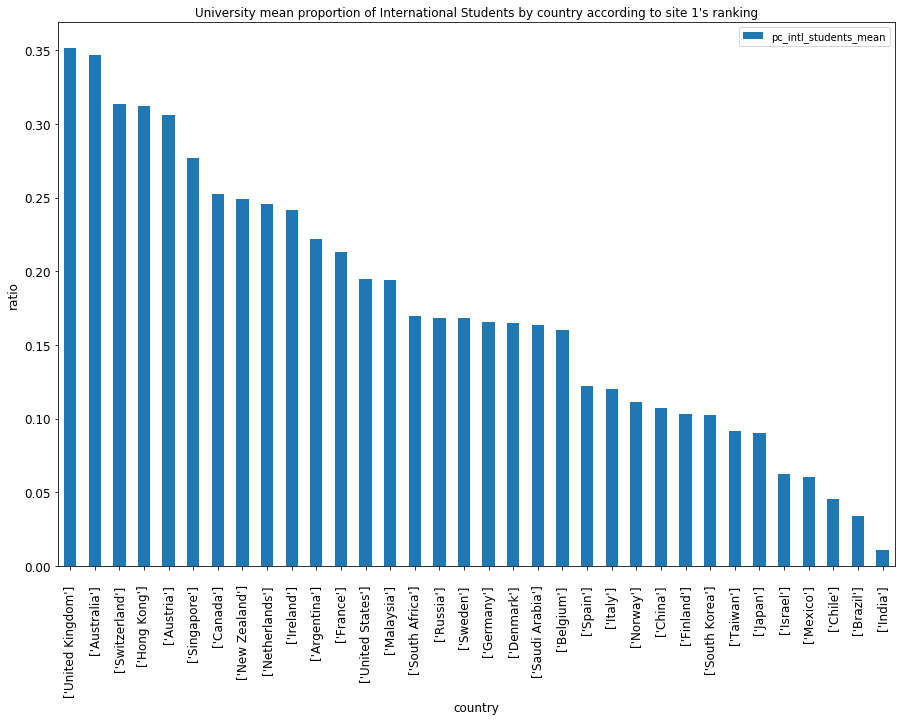

In [362]:
cx = uni_s1_RI_country[['pc_intl_students_mean']].plot(kind='bar', title ="University mean proportion of International Students by country according to site 1's ranking", figsize=(15, 10), legend=True, fontsize=12)
cx.set_xlabel("country", fontsize=12)
cx.set_ylabel("ratio", fontsize=12)
cx.set_xticklabels(uni_s1_RI_country.country)
cx.tick_params(axis='x', which='major', pad=15)
plt.show()

According to the rankings of the first website, the best countries are United Kingdom and Australia in terms of proportion of International students while the best are Russia and Denmark according to the Faculty Members to the number of Students ratio.

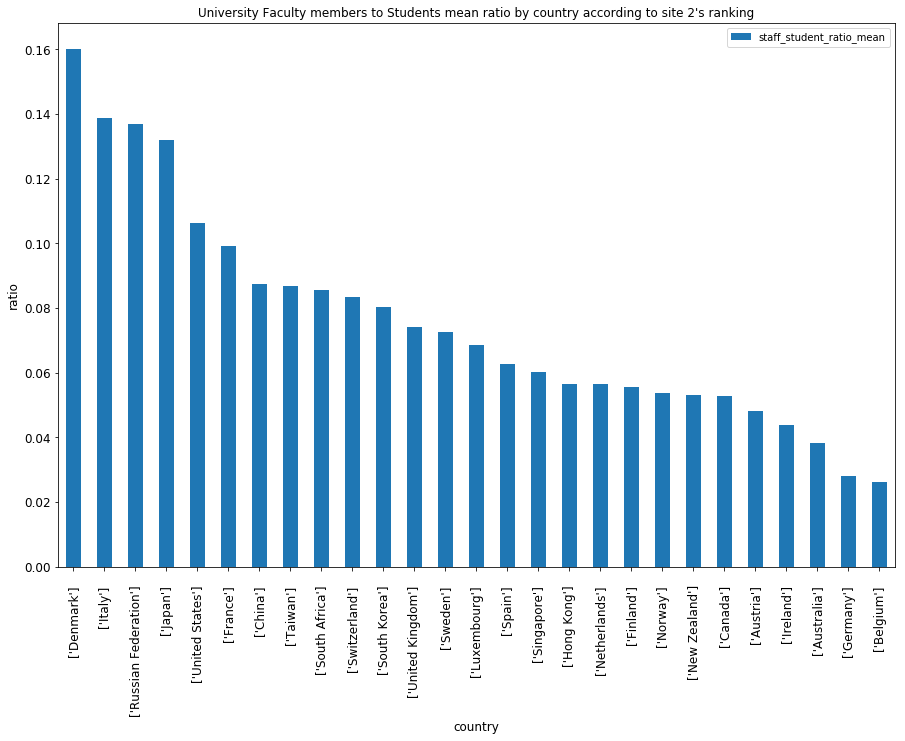

In [363]:
ax = uni_s2_RFC_country[['staff_student_ratio_mean']].plot(kind='bar', title ="University Faculty members to Students mean ratio by country according to site 2's ranking", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s2_RFC_country.country)
ax.tick_params(axis='x', which='major', pad=15)
plt.show()

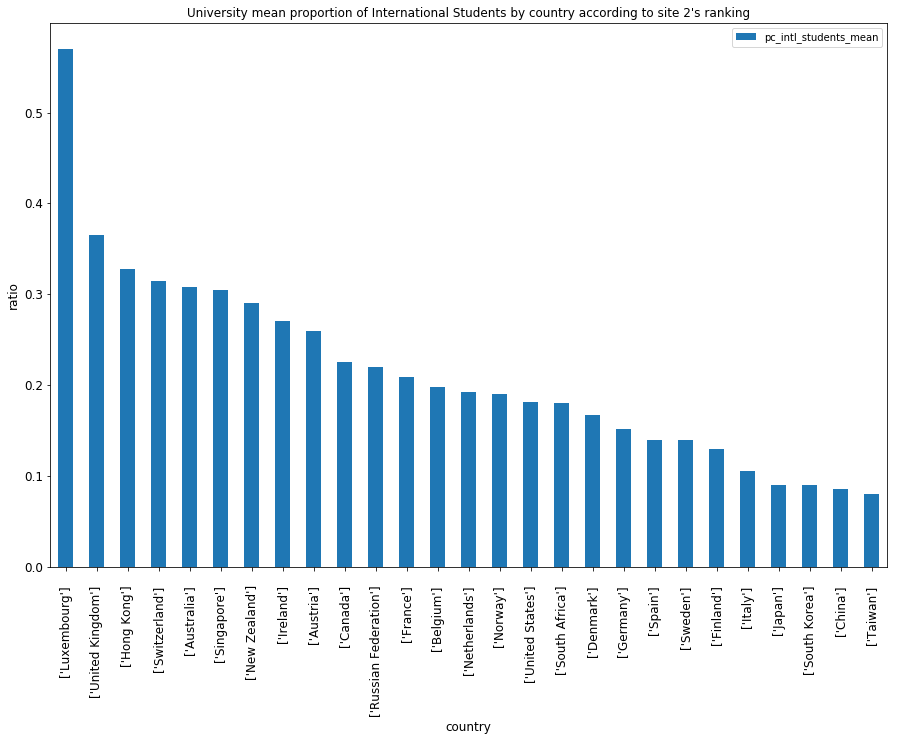

In [364]:
ax = uni_s2_RI_country[['pc_intl_students_mean']].plot(kind='bar', title ="University mean proportion of International Students by country according to site 2's ranking", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s2_RI_country.country)
ax.tick_params(axis='x', which='major', pad=15)
plt.show()

According to the rankings of the second website, the best countries are Luxembourg and United Kingdom in terms of proportion of International students while the best are Denmark and Italy according to the Faculty Members to the number of Students ratio.